In [1]:
import pandas as pd
df=pd.read_csv(r"C:\Users\dell\Desktop\archive (4)\sample_submission.csv")
df

prediction
0    sunflower
1    sunflower
2    sunflower
3    sunflower
4    sunflower
..         ...
919  sunflower
920  sunflower
921  sunflower
922  sunflower
923  sunflower

[924 rows x 1 columns]

In [2]:
df1=pd.read_csv(r"C:\Users\dell\Desktop\archive (4)\Testing_set_flower.csv")
df1

filename
0      Image_1.jpg
1      Image_2.jpg
2      Image_3.jpg
3      Image_4.jpg
4      Image_5.jpg
..             ...
919  Image_920.jpg
920  Image_921.jpg
921  Image_922.jpg
922  Image_923.jpg
923  Image_924.jpg

[924 rows x 1 columns]

In [3]:
# Project 2:
# Detect flowers based on images

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from matplotlib import style

# Model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

# preprocess
from keras.preprocessing.image import ImageDataGenerator

from keras import backend as k
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

from keras.layers import Dropout,Flatten,Activation
from keras.layers import Conv2D,MaxPooling2D,BatchNormalization

import tensorflow as tf
import random as rn

import cv2
import numpy as np
from tqdm import tqdm
import os
from random import shuffle
from zipfile import ZipFile
from PIL import Image

In [4]:
X=[]
Z=[]
IMG_SIZE=150

FLOWER_DAISEY_DIR=r"C:\Users\dell\Desktop\archive (4)\train\daisy"
FLOWER_SUNFLOWER_DIR=r"C:\Users\dell\Desktop\archive (4)\train\sunflower"
FLOWER_TULIP_DIR=r"C:\Users\dell\Desktop\archive (4)\train\tulip"
FLOWER_DANDI_DIR=r"C:\Users\dell\Desktop\archive (4)\train\dandelion"
FLOWER_ROSE_DIR=r"C:\Users\dell\Desktop\archive (4)\train\rose"

In [5]:
def assign_label(img,flower_type):
    return flower_type

In [6]:
# tqdm-->IT creats a progres bar from the loop
def make_train_data(flower_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,flower_type)
        path=os.path.join(DIR,img)
        img=cv2.imread(path,cv2.IMREAD_COLOR)
        img=cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        Z.append(str(label))

In [7]:
make_train_data("Daisy",FLOWER_DAISEY_DIR)
print(len(X))

100%|███████████████████████████████████████████████████████████████████████████████| 501/501 [00:03<00:00, 156.35it/s]

501


In [8]:
make_train_data('Sunflower',FLOWER_SUNFLOWER_DIR)
print(len(X))

100%|███████████████████████████████████████████████████████████████████████████████| 495/495 [00:03<00:00, 136.94it/s]

996


In [9]:
make_train_data('Tulip',FLOWER_TULIP_DIR)
print(len(X))

100%|███████████████████████████████████████████████████████████████████████████████| 531/531 [00:03<00:00, 140.47it/s]

1527


In [10]:
make_train_data('Dandelion',FLOWER_DANDI_DIR)
print(len(X))

100%|███████████████████████████████████████████████████████████████████████████████| 646/646 [00:04<00:00, 146.32it/s]

2173


In [11]:
make_train_data('Rose',FLOWER_ROSE_DIR)
print(len(X))

100%|███████████████████████████████████████████████████████████████████████████████| 497/497 [00:03<00:00, 142.80it/s]

2670


In [12]:
print(X)

[array([[[224, 216, 215],
        [220, 213, 209],
        [226, 217, 214],
        ...,
        [ 14,   9,   9],
        [ 17,  11,  12],
        [ 12,   7,   8]],

       [[225, 217, 216],
        [231, 223, 221],
        [224, 216, 215],
        ...,
        [ 15,  12,  13],
        [ 13,   7,   9],
        [ 12,   8,   7]],

       [[235, 227, 227],
        [231, 223, 220],
        [229, 223, 222],
        ...,
        [ 16,  14,  14],
        [ 13,   7,   9],
        [  8,   4,   3]],

       ...,

       [[182, 176, 177],
        [188, 183, 184],
        [202, 198, 194],
        ...,
        [138, 154, 160],
        [159, 169, 174],
        [166, 172, 182]],

       [[221, 216, 212],
        [228, 224, 216],
        [230, 226, 221],
        ...,
        [136, 153, 162],
        [159, 171, 179],
        [162, 170, 180]],

       [[237, 231, 229],
        [235, 228, 225],
        [241, 236, 232],
        ...,
        [138, 152, 161],
        [155, 171, 179],
        [160, 166, 179]

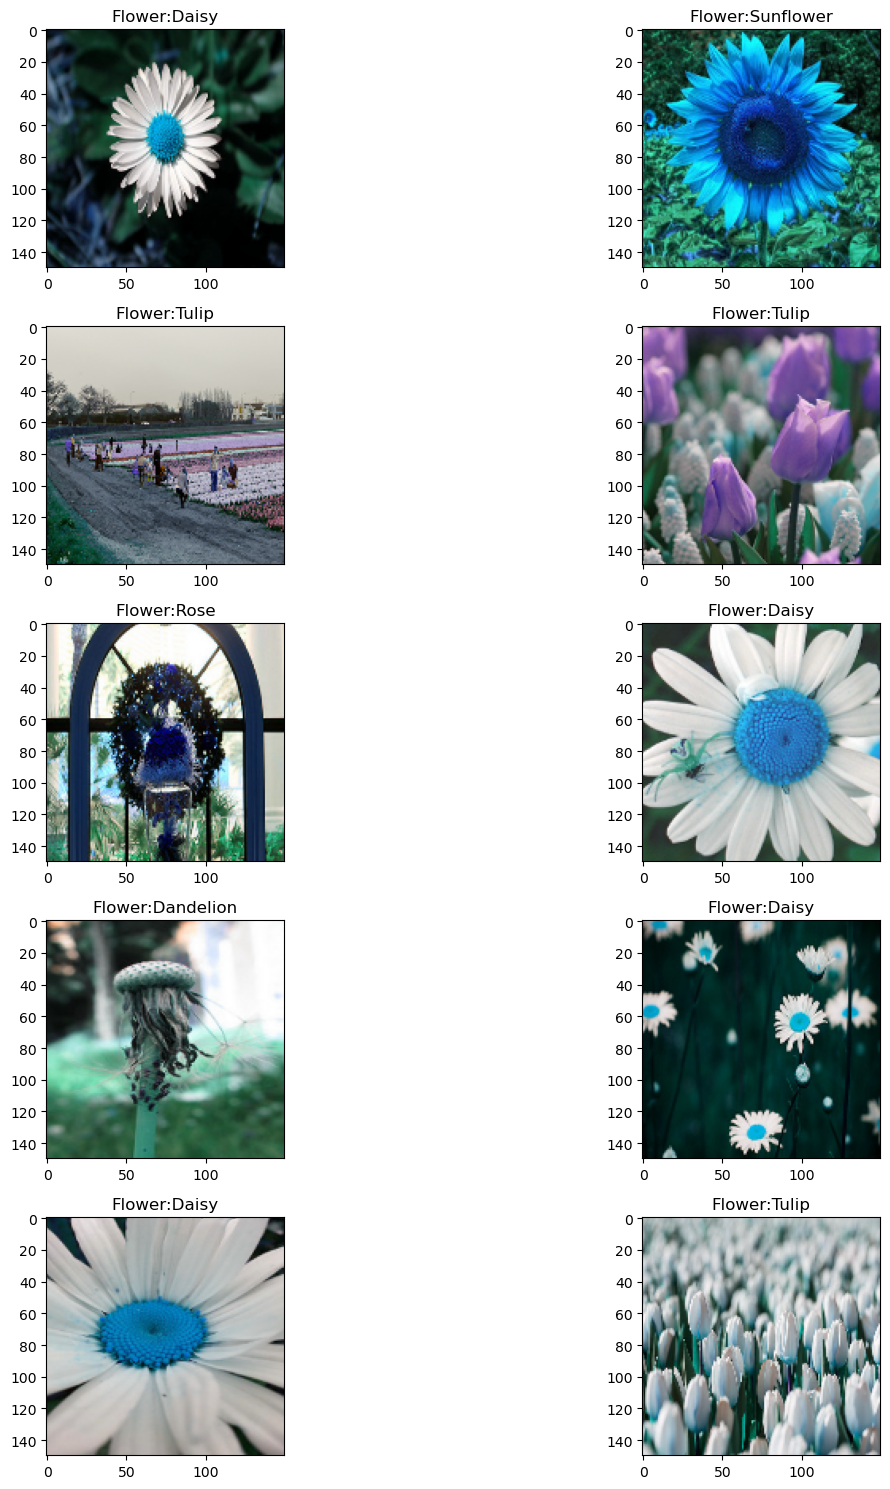

In [14]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)

for row in range(5):
    for col in range(2):
        l=rn.randint(0,len(Z))
        ax[row, col].imshow(X[l])
        ax[row, col].set_title("Flower:"+Z[l])
plt.tight_layout()

In [15]:
# Encoding all the flower names
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,5)
X=np.array(X)
X=X/255
# X==>contains all the image array
# Y-->contains all the image names
print(X)

[[[[0.87843137 0.84705882 0.84313725]
   [0.8627451  0.83529412 0.81960784]
   [0.88627451 0.85098039 0.83921569]
   ...
   [0.05490196 0.03529412 0.03529412]
   [0.06666667 0.04313725 0.04705882]
   [0.04705882 0.02745098 0.03137255]]

  [[0.88235294 0.85098039 0.84705882]
   [0.90588235 0.8745098  0.86666667]
   [0.87843137 0.84705882 0.84313725]
   ...
   [0.05882353 0.04705882 0.05098039]
   [0.05098039 0.02745098 0.03529412]
   [0.04705882 0.03137255 0.02745098]]

  [[0.92156863 0.89019608 0.89019608]
   [0.90588235 0.8745098  0.8627451 ]
   [0.89803922 0.8745098  0.87058824]
   ...
   [0.0627451  0.05490196 0.05490196]
   [0.05098039 0.02745098 0.03529412]
   [0.03137255 0.01568627 0.01176471]]

  ...

  [[0.71372549 0.69019608 0.69411765]
   [0.7372549  0.71764706 0.72156863]
   [0.79215686 0.77647059 0.76078431]
   ...
   [0.54117647 0.60392157 0.62745098]
   [0.62352941 0.6627451  0.68235294]
   [0.65098039 0.6745098  0.71372549]]

  [[0.86666667 0.84705882 0.83137255]
   [0.8

In [16]:
print(Y)

[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]]


In [18]:
#spliting to test and train dataset
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [19]:
print(Z)

['Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 

In [20]:
# set random seed
np.random.seed(42)
rn.seed(42)

tf.random.set_seed(42)

In [26]:
# Building the model
model=Sequential()

model.add(Conv2D(filters=32,kernel_size=(5,5),padding='same',activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

# 1 2 3 4 
# 5 6 7 8
# 9 10 11 12
# 13 14 15 16

# Maxpooling -->2x2
# 6 8
# 14 16

model.add(Conv2D(filters=64,kernel_size=(5,5),padding='same',activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=96,kernel_size=(5,5),padding='same',activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())
# Flatten function is used to convert multidimension to 2d dimension
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5,activation='softmax'))

In [27]:
# Adjest the learning rate

batch_size=128
epochs=50

from keras.callbacks import ReduceLROnPlateau
red_lr=ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

In [28]:
# To prevent overfitting

datagen=ImageDataGenerator(
featurewise_center=False,
samplewise_center=False,
featurewise_std_normalization=False,
samplewise_std_normalization=False,
zca_whitening=False,
rotation_range=10,
zoom_range=0.1,
width_shift_range=0.2,
height_shift_range=0.2,
horizontal_flip=True,
vertical_flip=False)
datagen.fit(x_train)

In [29]:
# compile keras model
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 150, 150, 32)      2432      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 75, 75, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 75, 75, 64)        51264     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 37, 37, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 37, 37, 96)        153696    
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 18, 18, 96)       

In [41]:
# firring on training and making predictions
History=model.fit_generator(datagen.flow(x_train,y_train,batch_size=batch_size),
                            epochs=epochs,validation_data=(x_test,y_test),verbose=1,
                            steps_per_epoch=x_train.shape[0]//batch_size)

C:\Users\dell\AppData\Local\Temp\ipykernel_5176\3935787489.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  History=model.fit_generator(datagen.flow(x_train,y_train,batch_size=batch_size),


Epoch 1/50
16/16 [==============================] - 55s 3s/step - loss: 0.4033 - accuracy: 0.8426 - val_loss: 0.7443 - val_accuracy: 0.7584
Epoch 2/50
16/16 [==============================] - 48s 3s/step - loss: 0.3782 - accuracy: 0.8546 - val_loss: 0.7905 - val_accuracy: 0.7584
Epoch 3/50
16/16 [==============================] - 50s 3s/step - loss: 0.3816 - accuracy: 0.8471 - val_loss: 0.8603 - val_accuracy: 0.7360
Epoch 4/50
16/16 [==============================] - 48s 3s/step - loss: 0.4434 - accuracy: 0.8367 - val_loss: 0.8308 - val_accuracy: 0.7210
Epoch 5/50
16/16 [==============================] - 56s 3s/step - loss: 0.4296 - accuracy: 0.8386 - val_loss: 0.7901 - val_accuracy: 0.7228
Epoch 6/50
16/16 [==============================] - 51s 3s/step - loss: 0.3860 - accuracy: 0.8521 - val_loss: 0.8601 - val_accuracy: 0.7172
Epoch 7/50
16/16 [==============================] - 47s 3s/step - loss: 0.3733 - accuracy: 0.8650 - val_loss: 0.7035 - val_accuracy: 0.7753
Epoch 8/50
16/16 [==

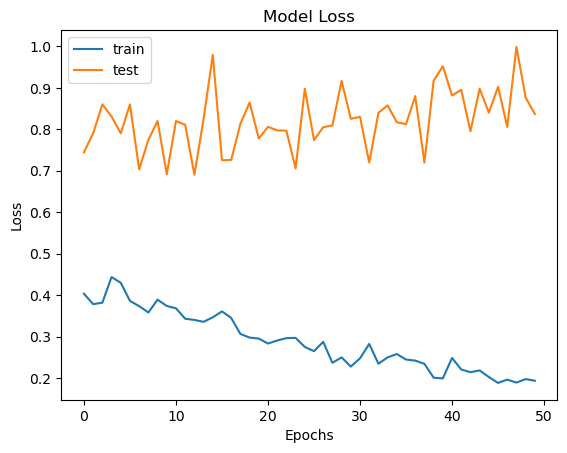

In [42]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

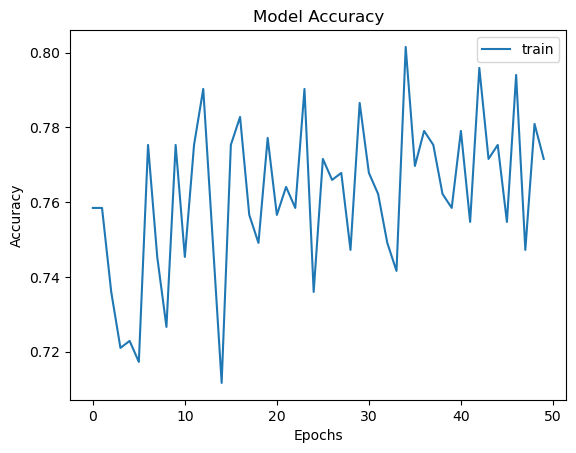

In [44]:
# plt.plot(History.history['acc'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [45]:
# getting predictions on val set.
pred=model.predict(x_test)
pred_digits=np.argmax(pred,axis=1)

17/17 [==============================] - 3s 146ms/step


In [46]:
# now storing some properly as well as misclassified indexes'.
i=0
prop_class=[]
mis_class=[]

for i in range(len(y_test)):
    if(np.argmax(y_test[i])==pred_digits[i]):
        prop_class.append(i)
    if(len(prop_class)==8):
        break

i=0
for i in range(len(y_test)):
    if(not np.argmax(y_test[i])==pred_digits[i]):
        mis_class.append(i)
    if(len(mis_class)==8):
        break

C:\Users\dell\AppData\Local\Temp\ipykernel_5176\3282259705.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


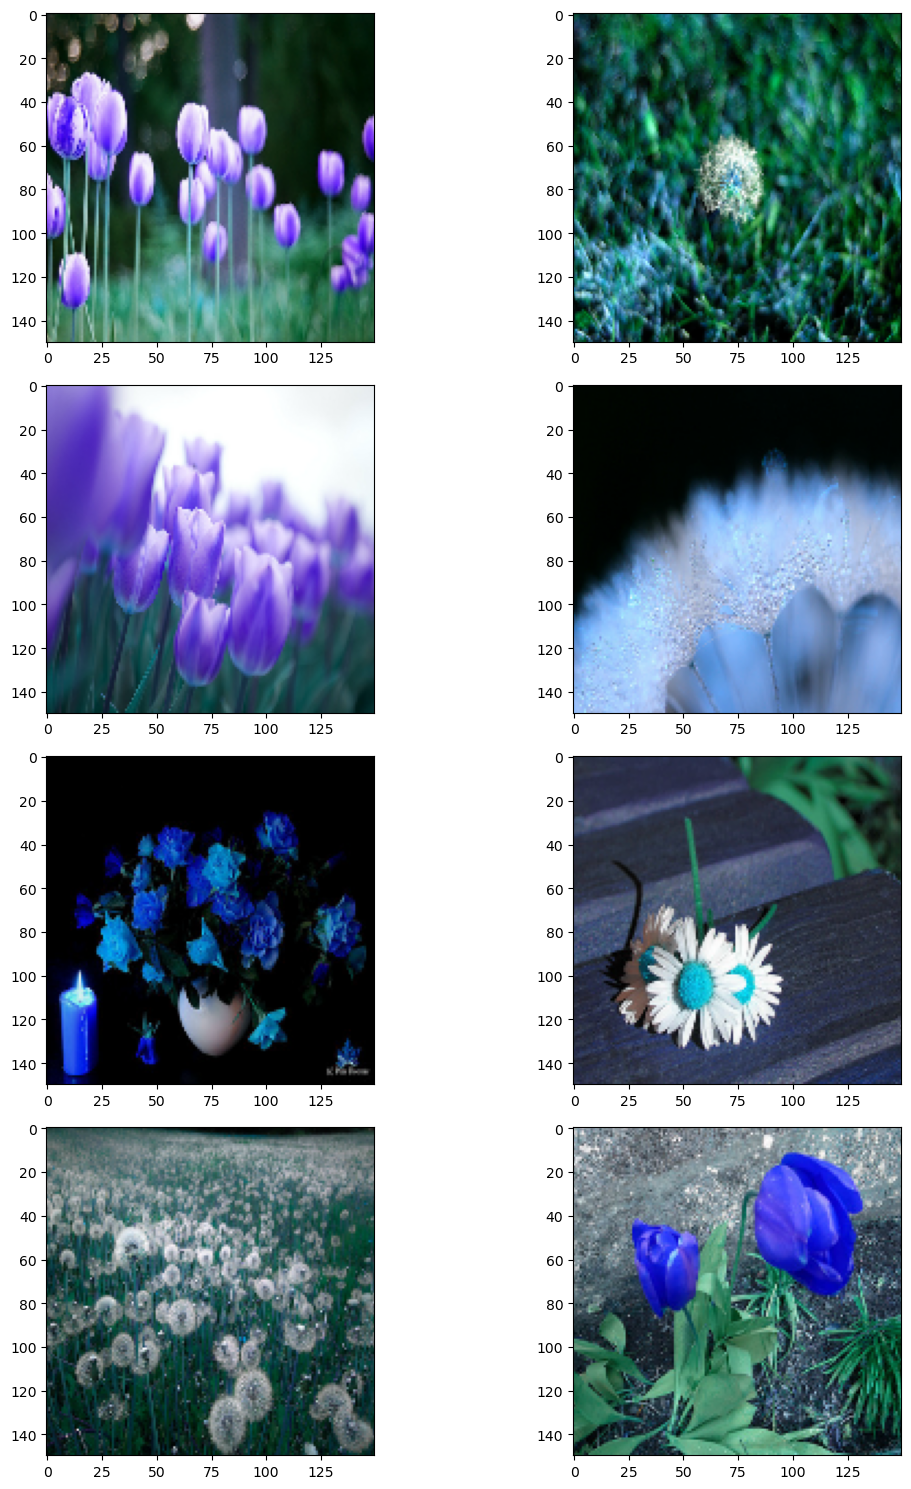

In [47]:
count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[prop_class[count]])
        # ax[i,j].set_title("Predicted Flower : "+str(le.inverse_transform([pred_digits[prop_class[count]]]))+"\n"+"Actual Flower : "+str(le.inverse_transform(np.argmax([y_test[prop_class[count]]]))))
        plt.tight_layout()
        count+=1

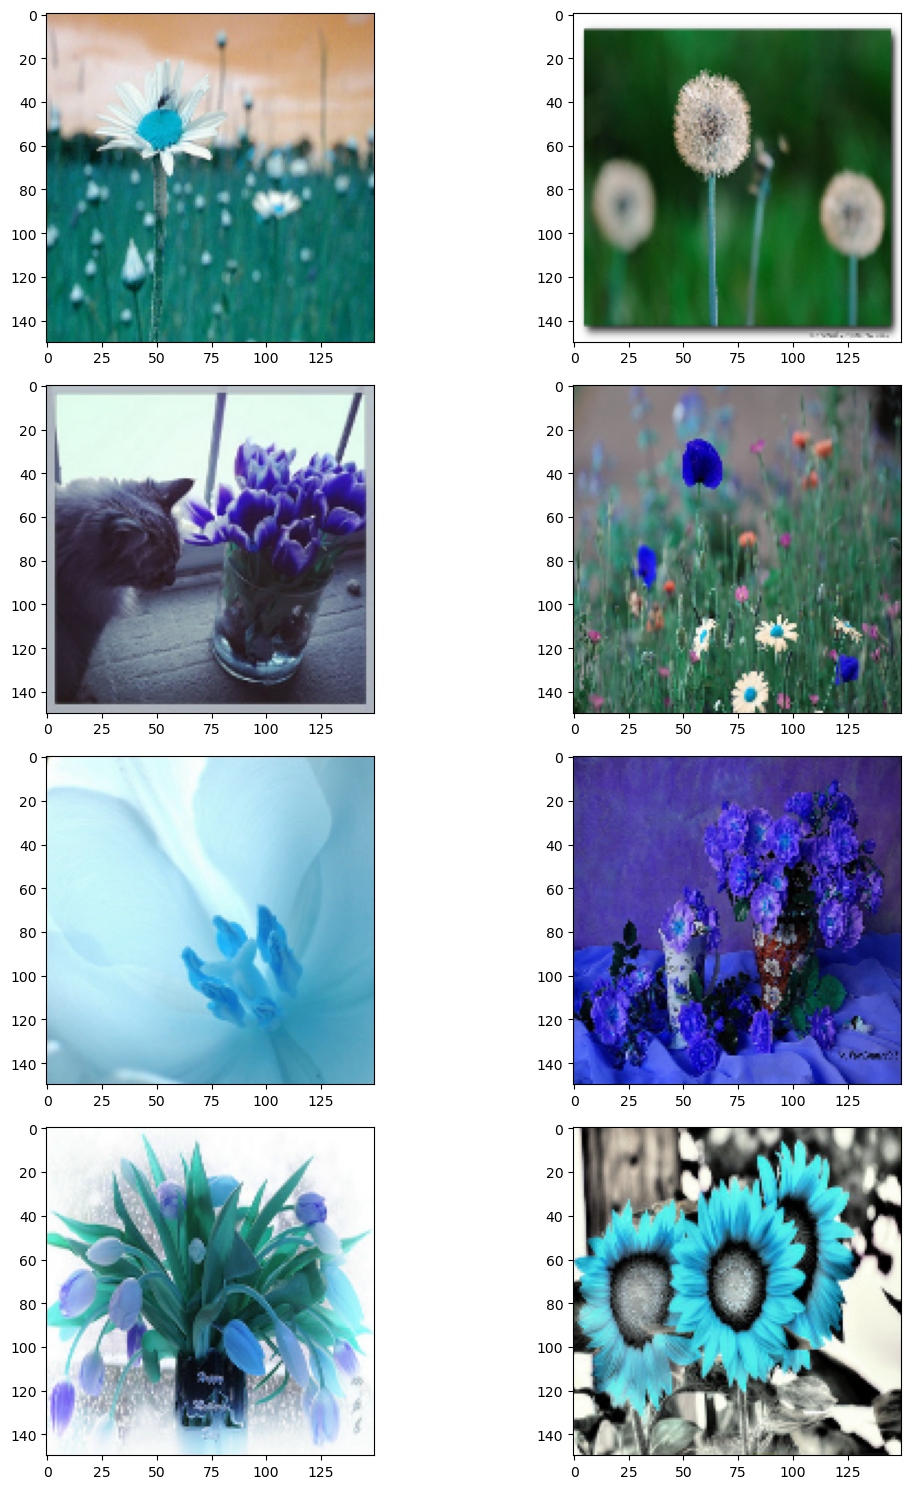

In [51]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[mis_class[count]])
        # ax[i,j].set_title("Predicted Flower : "+str(le.inverse_transform([pred_digits[mis_class[count]]]))+"\n"+"Actual Flower : "+str(le.inverse_transform(np.argmax([y_test[mis_class[count]]]))))
        plt.tight_layout()
        count+=1